**Link to datasource:** https://raw.githubusercontent.com/huynhthiailinh/data/main/movie-detail.csv

# Prediction of movies's gross


*   **Problem**: study to build a system that can make accurate prediction about the gross for a movie when it has just been launched, using some descriptions about the movie.
*   **Input**: the budget of film
*   **Output**: gross for that movie
*   **Method** to be used: Linear Regression, Support Vector Regression
*   **Dataset**: a set of budget and gross of movies. The data will be collected from the-numbers.com. 





In [689]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

sns.set_theme(style="darkgrid")

In [690]:
df = pd.read_csv('https://raw.githubusercontent.com/huynhthiailinh/data/main/test.csv')
df.head()

,Unnamed: 0,ReleaseDate,Movie,RunningTime,Source,Genre,ProductionMethod,CreativeType,ProductionCompanies,ProductionCountries,Languages,ProductionBudget,DomesticGross,WorldwideGross
0,1,Apr 23 2019,Avengers: Endgame,181 minutes,Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English,400000000,858373000,2797800564
1,2,May 20 2011,Pirates of the Caribbean: On Stranger Tides,136 minutes,Based on Theme Park Ride,Adventure,Live Action,Historical Fiction,Walt Disney Pictures,United States,English,379000000,241071802,1045713802
2,3,Apr 22 2015,Avengers: Age of Ultron,141 minutes,Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English,365000000,459005868,1395316979
3,4,Dec 16 2015,Star Wars Ep. VII: The Force Awakens,136 minutes,Original Screenplay,Adventure,Animation/Live Action,Science Fiction,"Lucasfilm, Bad Robot",United States,English,306000000,936662225,2064615817
4,5,Apr 25 2018,Avengers: Infinity War,156 minutes,Based on Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,Marvel Studios,United States,English,300000000,678815482,2048359754


In [691]:
df.shape

(6286, 14)

## Check missing value

In [692]:
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [693]:
df['ReleaseDate'] = df['ReleaseDate'].replace('Unknown', np.nan)

In [694]:
df['DomesticGross'] = df['DomesticGross'].replace(0, np.nan)

In [695]:
df['WorldwideGross'] = df['WorldwideGross'].replace(0, np.nan)

In [696]:
df.isnull().sum()

Id                        0
ReleaseDate             114
Movie                     0
RunningTime            1075
Source                  253
Genre                   160
ProductionMethod        176
CreativeType            303
ProductionCompanies    2334
ProductionCountries     498
Languages              1021
ProductionBudget          0
DomesticGross           679
WorldwideGross          412
dtype: int64

## Check data type

In [697]:
df['ReleaseDate'] = df['ReleaseDate'].transform(lambda x: str(x).split(' ')[-1])
df['ReleaseDate'] = df['ReleaseDate'].apply(pd.to_numeric, args=('coerce',))

In [698]:
df['RunningTime'] = df['RunningTime'].transform(lambda x: str(x).split(' ')[0])
df['RunningTime'] = df['RunningTime'].apply(pd.to_numeric, args=('coerce',))

In [699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6286 entries, 0 to 6285
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   6286 non-null   int64  
 1   ReleaseDate          6172 non-null   float64
 2   Movie                6286 non-null   object 
 3   RunningTime          5211 non-null   float64
 4   Source               6033 non-null   object 
 5   Genre                6126 non-null   object 
 6   ProductionMethod     6110 non-null   object 
 7   CreativeType         5983 non-null   object 
 8   ProductionCompanies  3952 non-null   object 
 9   ProductionCountries  5788 non-null   object 
 10  Languages            5265 non-null   object 
 11  ProductionBudget     6286 non-null   int64  
 12  DomesticGross        5607 non-null   float64
 13  WorldwideGross       5874 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 687.7+ KB


## Describe

In [700]:
df.describe()

,Id,ReleaseDate,RunningTime,ProductionBudget,DomesticGross,WorldwideGross
count,6286.000000,6172.000000,5211.000000,6.286000e+03,5.607000e+03,5.874000e+03
mean,3143.500000,2004.727317,108.412397,3.197317e+07,4.631910e+07,9.808887e+07
std,1814.756228,13.088285,20.188501,4.259353e+07,7.241485e+07,1.855515e+08
min,1.000000,1915.000000,9.000000,8.600000e+01,2.640000e+02,1.700000e+01
25%,1572.250000,2000.000000,95.000000,5.000000e+06,4.210792e+06,6.662037e+06
50%,3143.500000,2007.000000,105.000000,1.680000e+07,2.141636e+07,3.224374e+07
75%,4714.750000,2014.000000,119.000000,4.000000e+07,5.698408e+07,1.029795e+08
max,6286.000000,2025.000000,260.000000,4.000000e+08,9.366622e+08,2.845900e+09


## Plot

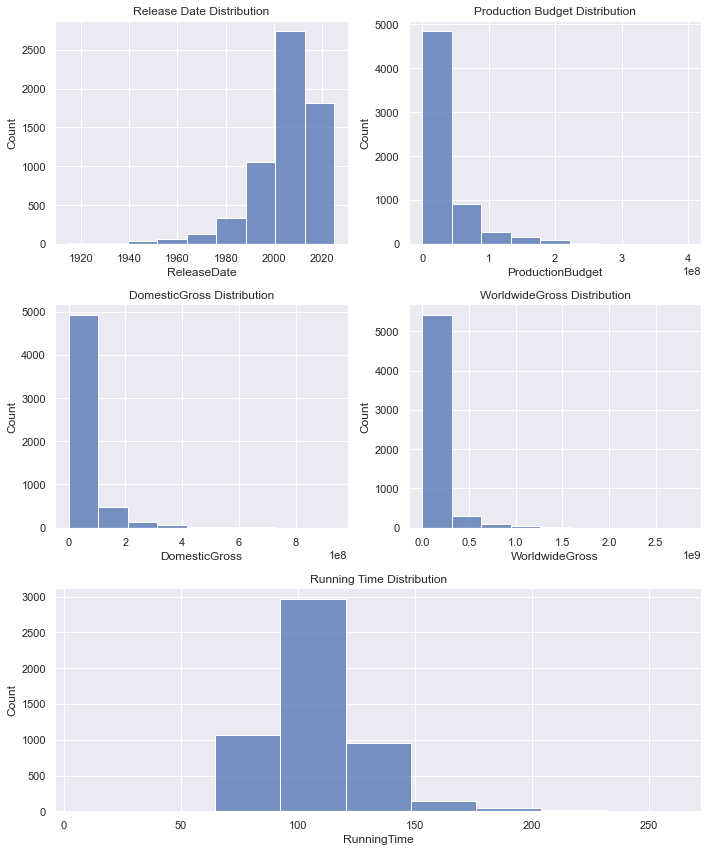

In [701]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

ax1 = plt.subplot(321)
ax1 = sns.histplot(df['ReleaseDate'], bins=9)
ax1.set_title("Release Date Distribution")

ax3 = plt.subplot(322)
ax3 = sns.histplot(df['ProductionBudget'], bins=9)
ax3.set_title("Production Budget Distribution")

ax4 = plt.subplot(323)
ax4 = sns.histplot(df['DomesticGross'], bins=9)
ax4.set_title("DomesticGross Distribution")

ax5 = plt.subplot(324)
ax5 = sns.histplot(df['WorldwideGross'], bins=9)
ax5.set_title("WorldwideGross Distribution")

ax2 = plt.subplot(313)
ax2 = sns.histplot(df['RunningTime'], bins=9)
ax2.set_title("Running Time Distribution")

plt.tight_layout()

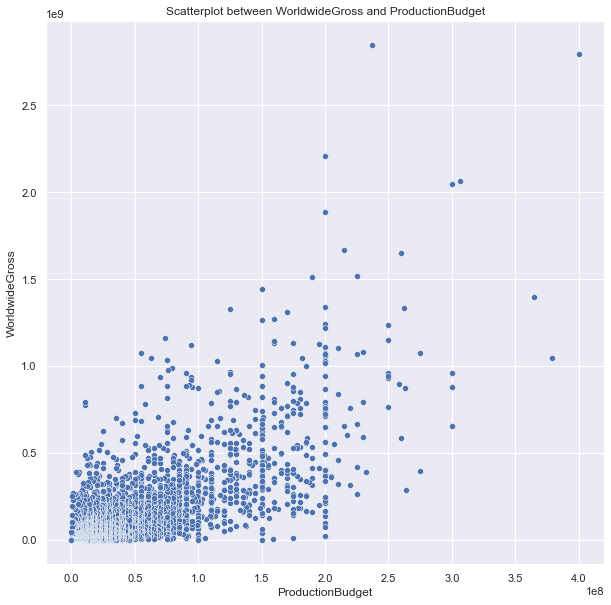

In [702]:
plt.figure(figsize=(10, 10))
sns.set(color_codes=True)
ax = sns.scatterplot(x=df['ProductionBudget'], y=df['WorldwideGross'], data=df['WorldwideGross'])
plt.title('Scatterplot between WorldwideGross and ProductionBudget')
plt.show()

Text(0.5, 1.0, 'Correlation between numeric features')

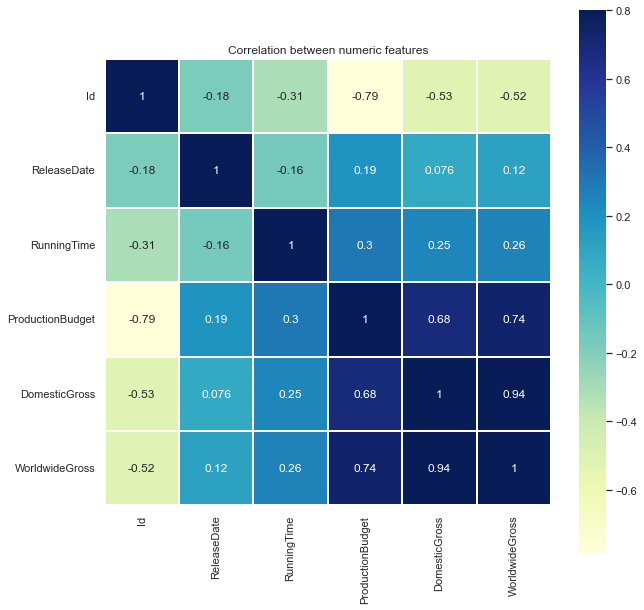

In [703]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor="white")
plt.title('Correlation between numeric features')

In [704]:
df.corr()["WorldwideGross"]

Id                 -0.519830
ReleaseDate         0.120878
RunningTime         0.261487
ProductionBudget    0.737119
DomesticGross       0.939153
WorldwideGross      1.000000
Name: WorldwideGross, dtype: float64

# Feature engineering


In [705]:
colors = sns.color_palette('pastel')

## Data cleaning

### missing data

In [706]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values = round(df.isna().sum()/len(df)*100, 2)
Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]

Percentage Of Missing Values


ReleaseDate             1.81
RunningTime            17.10
Source                  4.02
Genre                   2.55
ProductionMethod        2.80
CreativeType            4.82
ProductionCompanies    37.13
ProductionCountries     7.92
Languages              16.24
DomesticGross          10.80
WorldwideGross          6.55
dtype: float64

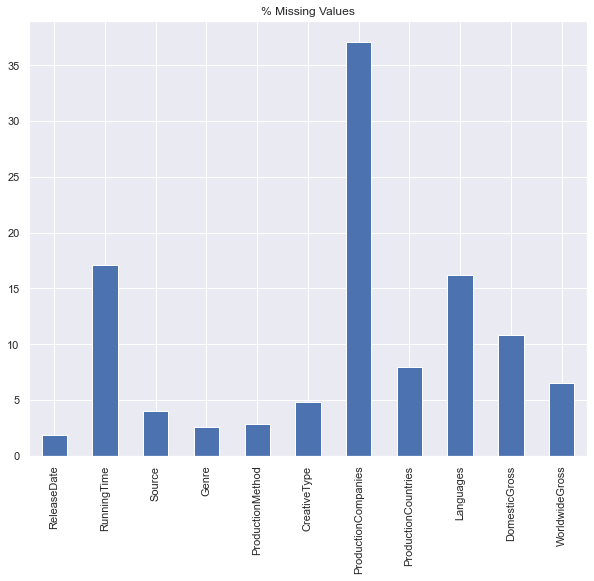

In [707]:
only_missing=Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]
plt.figure(figsize=(10, 8))
only_missing.plot(kind="bar")
plt.title("% Missing Values")
plt.show()

In [708]:
complete_df = df[~pd.isna(df).any(axis=1)].reset_index(drop=True)
complete_df.shape

(3548, 14)

#### Id

In [709]:
del df['Id']

#### DomesticGross & WorldwideGross

Xoá các dòng có phần tử dữ liệu ở cột **DomesticGross**, **WorldwideGross** bị bỏ trống, vì đây là giá trị dự đoán.

In [710]:
df = df[df['DomesticGross'].notna()]
df = df[df['WorldwideGross'].notna()]
df.shape

(5607, 13)

In [711]:
df.isnull().sum()

ReleaseDate               1
Movie                     0
RunningTime             867
Source                  189
Genre                   117
ProductionMethod        127
CreativeType            247
ProductionCompanies    1924
ProductionCountries     441
Languages               939
ProductionBudget          0
DomesticGross             0
WorldwideGross            0
dtype: int64

In [712]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values = round(df.isna().sum()/len(df)*100, 2)
Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]

Percentage Of Missing Values


ReleaseDate             0.02
RunningTime            15.46
Source                  3.37
Genre                   2.09
ProductionMethod        2.27
CreativeType            4.41
ProductionCompanies    34.31
ProductionCountries     7.87
Languages              16.75
dtype: float64

#### ReleaseDate

In [713]:
df = df[df['ReleaseDate'].notna()]
df.shape

(5606, 13)

#### RunningTime

In [714]:
class MissingDataHandler:
  @staticmethod
  def fill_nan_by_median(df: pd.DataFrame, col: str, new_col:str):
    dt = df.copy()
    median = dt[col].dropna().median()
    print(f"Median of {col} = {median}")

    dt[new_col] = dt[col]
    dt[new_col].fillna(median, inplace=True)
    return dt
  
  @staticmethod
  def fill_nan_by_mean(df: pd.DataFrame, col: str, new_col: str):
    dt = df.copy()
    mean = dt[col].dropna().mean()
    print(f"Mean of {col} = {mean}")

    dt[new_col] = dt[col]
    dt[new_col].fillna(mean, inplace=True)
    return dt

  @staticmethod
  def fill_nan_by_mode(df: pd.DataFrame, col: str, new_col: str):
    dt = df.copy()
    mode_age = dt.mode()[col].values[0]
    print(f"Mode of {col} = {mode_age}")

    dt[new_col] = dt[col]
    dt[new_col].fillna(mode_age, inplace=True)
    return dt

  @staticmethod
  def fill_nan_by_end_distribution(df: pd.DataFrame, col: str, new_col: str):
    dt = df.copy()
    extreme = dt[col].mean() + 3 * dt[col].std()
    print(f'End of distribution of {col}: {extreme}')

    dt[new_col] = dt[col].fillna(extreme)
    return dt

  @staticmethod
  def fill_nan_by_random(df: pd.DataFrame, col: str, new_col: str):
    dt = df.copy()
    number_null_row = dt[col].isnull().sum()
    random_samples = dt[col].dropna().sample(n=number_null_row, random_state=0)

    dt[new_col] = dt[col]
    random_samples.index = dt[dt[col].isnull()].index
    dt.loc[dt[col].isnull(), new_col] = random_samples
    return dt

  @staticmethod
  def fill_nan_by_arbitrary(df: pd.DataFrame, col: str, new_col: str, start: int, end: int):
    dt = df.copy()
    dt[new_col] = dt[col].fillna(np.random.randint(start, end))
    return dt

In [715]:
df['RunningTime_NAN'] = np.where(df['RunningTime'].isnull(), 1, 0)
df = MissingDataHandler.fill_nan_by_median(df, 'RunningTime', 'RunningTime_median')
df = MissingDataHandler.fill_nan_by_mean(df, 'RunningTime', 'RunningTime_mean')
df = MissingDataHandler.fill_nan_by_mode(df, 'RunningTime', 'RunningTime_mode')
df = MissingDataHandler.fill_nan_by_end_distribution(df, 'RunningTime', 'RunningTime_end_dist')
df = MissingDataHandler.fill_nan_by_random(df, 'RunningTime', 'RunningTime_random')
df = MissingDataHandler.fill_nan_by_arbitrary(df, 'RunningTime', 'RunningTime_arbitrary', start=0, end=127)

Median of RunningTime = 106.0
Mean of RunningTime = 109.39599156118143
Mode of RunningTime = 100.0
End of distribution of RunningTime: 169.34725458791968


In [716]:
print(f"Std of RunningTime = {df['RunningTime'].std()}")
print(f"Std of RunningTime_median = {df['RunningTime_median'].std()}")
print(f"Std of RunningTime_mean = {df['RunningTime_mean'].std()}")
print(f"Std of RunningTime_mode = {df['RunningTime_mode'].std()}")
print(f"Std of RunningTime_end_dist = {df['RunningTime_end_dist'].std()}")
print(f"Std of RunningTime_random = {df['RunningTime_random'].std()}")
print(f"Std of RunningTime_arbitrary = {df['RunningTime_arbitrary'].std()}")

Std of RunningTime = 19.983754342246083
Std of RunningTime_median = 18.41617346915039
Std of RunningTime_mean = 18.375223417793325
Std of RunningTime_mode = 18.68641521605531
Std of RunningTime_end_dist = 28.410909102097314
Std of RunningTime_random = 19.834493554006947
Std of RunningTime_arbitrary = 40.996965095725834


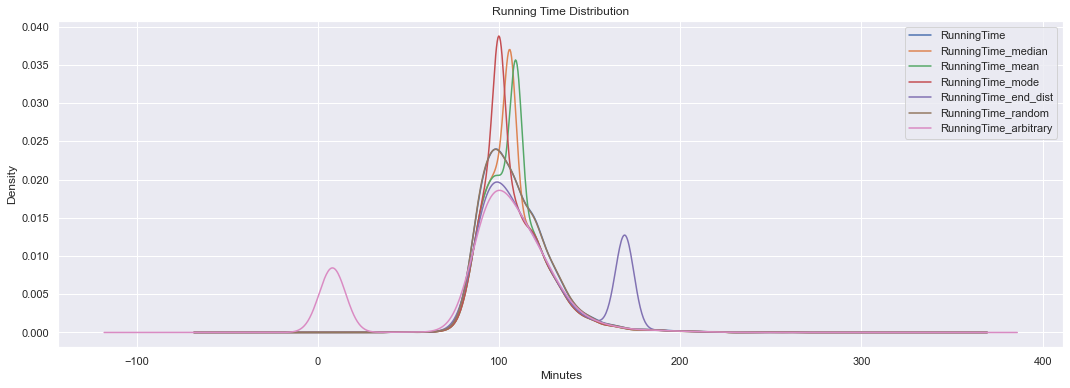

In [717]:
fig, ax = plt.subplots(figsize=(18, 6))
df.RunningTime.plot(kind='kde')
df.RunningTime_median.plot(kind='kde')
df.RunningTime_mean.plot(kind='kde')
df.RunningTime_mode.plot(kind='kde')
df.RunningTime_end_dist.plot(kind='kde')
df.RunningTime_random.plot(kind='kde')
df.RunningTime_arbitrary.plot(kind='kde')
plt.xlabel("Minutes")
plt.title("Running Time Distribution")
lines, labels = ax.get_legend_handles_labels()
plt.legend(lines, labels, loc='best')

In [718]:
del df['RunningTime_NAN']
del df['RunningTime_median']
del df['RunningTime_mean']
del df['RunningTime_mode']
del df['RunningTime_end_dist']
del df['RunningTime_random']
del df['RunningTime_arbitrary']

In [719]:
random_samples = df['RunningTime'].dropna().sample(n=df['RunningTime'].isnull().sum(),random_state=0)
df[df['RunningTime'].isnull()].index
random_samples.index = df[df['RunningTime'].isnull()].index
df['RunningTime_random']=df['RunningTime']
df.loc[df['RunningTime'].isnull(), 'RunningTime_random']=random_samples
del df['RunningTime']
df.rename(columns={'RunningTime_random': 'RunningTime'}, inplace=True)

In [720]:
df.isnull().sum()

ReleaseDate               0
Movie                     0
Source                  189
Genre                   117
ProductionMethod        127
CreativeType            246
ProductionCompanies    1923
ProductionCountries     440
Languages               938
ProductionBudget          0
DomesticGross             0
WorldwideGross            0
RunningTime               0
dtype: int64

#### Source

In [721]:
df['Source'].fillna('Others', inplace=True)
df['Source'] = df['Source'].transform(lambda x: str(x).replace('Based on ', ''))
df['Source'].value_counts()

Original Screenplay           2874
Fiction Book/Short Story      1064
Real Life Events               442
Remake                         208
Others                         189
Comic/Graphic Novel            180
TV                             165
Factual Book/Article           151
Play                            97
Game                            45
Folk Tale/Legend/Fairytale      43
Spin-Off                        29
Short Film                      25
Religious Text                  20
Musical or Opera                19
Movie                           17
Toy                             16
Theme Park Ride                  8
Compilation                      5
Musical Group                    3
Ballet                           3
Web Series                       1
Song                             1
Poem                             1
Name: Source, dtype: int64

#### Genre

In [722]:
df['Genre'].fillna('Others', inplace=True)
df['Genre'].value_counts()

Drama                  1515
Comedy                  939
Action                  718
Adventure               671
Thriller/Suspense       556
Horror                  444
Romantic Comedy         250
Others                  117
Documentary             110
Musical                 100
Black Comedy             99
Western                  72
Concert/Performance      14
Multiple Genres           1
Name: Genre, dtype: int64

#### ProductionMethod

In [723]:
df['ProductionMethod'].fillna('Others', inplace=True)
df['ProductionMethod'].value_counts()

Live Action                    5036
Digital Animation               184
Animation/Live Action           173
Others                          127
Hand Animation                   69
Stop-Motion Animation            14
Rotoscoping                       2
Multiple Production Methods       1
Name: ProductionMethod, dtype: int64

#### CreativeType

In [724]:
df['CreativeType'].fillna('Others', inplace=True)
df['CreativeType'].value_counts()

Contemporary Fiction       2810
Historical Fiction          637
Dramatization               489
Science Fiction             476
Fantasy                     382
Kids Fiction                323
Others                      246
Factual                     123
Super Hero                  114
Multiple Creative Types       6
Name: CreativeType, dtype: int64

#### ProductionCompanies

In [725]:
df['ProductionCompanies'].fillna('Others', inplace=True)
df['ProductionCompanies'].value_counts()

Others                                                                            1923
Warner Bros.                                                                        28
Columbia Pictures                                                                   21
Universal Pictures                                                                  20
Walt Disney Pictures                                                                19
                                                                                  ... 
Universal Pictures, Anonymous Content, Working Title Films                           1
Summit Entertainment, Mediaset Espana, Apaches Entertainment, Telecinco Cinema       1
DreamWorks Pictures, Work After Midnight, Saturn Films                               1
Annapurna Pictures, First Light                                                      1
THINKFilm                                                                            1
Name: ProductionCompanies, Length: 3039, dt

In [726]:
import collections
from collections import OrderedDict
from operator import itemgetter

data = []

df['ProductionCompanies_split'] = df['ProductionCompanies'].str.split(', ')

for i in df['ProductionCompanies_split']:
  if isinstance(i, list):
    data += i

d = OrderedDict(sorted(collections.Counter(data).items()))
d

OrderedDict([(' Haven Entertainment', 1),
             ('02 Filmes', 1),
             ('10 West Studios', 2),
             ('10 by 10 Entertainment', 1),
             ('1000 Eyes', 1),
             ('1019 Entertainment', 1),
             ('1211 Entertainment', 1),
             ('1212 Entertainment', 1),
             ('127 Wall', 1),
             ('1405 Communications', 1),
             ('1492 Pictures', 20),
             ('16:14 Entertainment', 1),
             ('1821 Pictures', 3),
             ('1978 Films', 1),
             ('1984 PDC', 1),
             ('1984 Private Defense Contractors', 2),
             ('2 Entertain', 1),
             ('2.0 Entertainment', 4),
             ('2.4.7. Films', 1),
             ('20th Century Fox', 95),
             ('20th Century Fox Animation', 8),
             ('20th Century Fox Television', 1),
             ('20th Century Studios', 3),
             ('21 Laps Entertainment', 17),
             ('21st Century Film Corporation', 1),
             ('22

In [727]:
del df['ProductionCompanies_split']
del df['ProductionCompanies']

#### ProductionCountries

In [728]:
df['ProductionCountries'].value_counts()

United States                                   3908
United Kingdom                                   174
United Kingdom, United States                    168
France                                            70
Canada, United States                             50
                                                ... 
Costa Rica, United States                          1
Australia, China, Germany                          1
Canada, Czech Republic, France                     1
Czech Republic, France, Germany                    1
Islamic Republic of Iran, Italy, Switzerland       1
Name: ProductionCountries, Length: 292, dtype: int64

In [729]:
from collections import OrderedDict
from operator import itemgetter

data = []

df['ProductionCountries_split'] = df['ProductionCountries'].str.split(', ')

for i in df['ProductionCountries_split']:
  if isinstance(i, list):
    data += i

del df['ProductionCountries_split']
sorted(collections.Counter(data).items(), key=lambda item: item[1], reverse = True)[:5]

[('United States', 4483),
 ('United Kingdom', 508),
 ('France', 243),
 ('Germany', 151),
 ('Canada', 146)]

In [730]:
df['ProductionCountries'].fillna('Others', inplace=True)
df['ProductionCountries'] = df['ProductionCountries'].transform(lambda x: 'United States' if 'United States' in str(x).split(', ') else 'Others')
df['ProductionCountries'].value_counts()

United States    4482
Others           1124
Name: ProductionCountries, dtype: int64

#### Languages

In [731]:
df['Languages'].value_counts()

English                                                                   4060
English, Spanish                                                            61
French                                                                      46
English, French                                                             39
Spanish                                                                     21
                                                                          ... 
Mandarin, Mongolian                                                          1
Arabic, English, German                                                      1
Arabic, English, French, German, Hungarian, Japanese, Russian, Spanish       1
English, German, Mandarin, Tibetan                                           1
Tamil                                                                        1
Name: Languages, Length: 228, dtype: int64

In [732]:
from collections import OrderedDict
from operator import itemgetter

data = []

df['Languages_split'] = df['Languages'].str.split(', ')

for i in df['Languages_split']:
  if isinstance(i, list):
    data += i

del df['Languages_split']
sorted(collections.Counter(data).items(), key=lambda item: item[1], reverse = True)[:5]

[('English', 4465),
 ('French', 164),
 ('Spanish', 126),
 ('German', 74),
 ('Japanese', 52)]

In [733]:
df['Languages'].fillna('Others', inplace=True)
df['Languages'] = df['Languages'].transform(lambda x: 'English' if 'English' in str(x).split(', ') else 'Others')
df['Languages'].value_counts()

English    4459
Others     1147
Name: Languages, dtype: int64

In [734]:
df.isnull().sum()

ReleaseDate            0
Movie                  0
Source                 0
Genre                  0
ProductionMethod       0
CreativeType           0
ProductionCountries    0
Languages              0
ProductionBudget       0
DomesticGross          0
WorldwideGross         0
RunningTime            0
dtype: int64

### split train and test

In [735]:
df.head()

,ReleaseDate,Movie,Source,Genre,ProductionMethod,CreativeType,ProductionCountries,Languages,ProductionBudget,DomesticGross,WorldwideGross,RunningTime
0,2019.0,Avengers: Endgame,Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,United States,English,400000000,858373000.0,2.797801e+09,181.0
1,2011.0,Pirates of the Caribbean: On Stranger Tides,Theme Park Ride,Adventure,Live Action,Historical Fiction,United States,English,379000000,241071802.0,1.045714e+09,136.0
2,2015.0,Avengers: Age of Ultron,Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,United States,English,365000000,459005868.0,1.395317e+09,141.0
3,2015.0,Star Wars Ep. VII: The Force Awakens,Original Screenplay,Adventure,Animation/Live Action,Science Fiction,United States,English,306000000,936662225.0,2.064616e+09,136.0
4,2018.0,Avengers: Infinity War,Comic/Graphic Novel,Action,Animation/Live Action,Super Hero,United States,English,300000000,678815482.0,2.048360e+09,156.0


In [736]:
df.shape

(5606, 12)

In [737]:
df.to_csv('clean-data.csv')

In [738]:
from sklearn.model_selection import train_test_split

y = df['WorldwideGross']
X = df.copy().drop(columns = ['DomesticGross', 'WorldwideGross'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

### Ouliers

In [739]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4484 entries, 5307 to 887
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ReleaseDate          4484 non-null   float64
 1   Movie                4484 non-null   object 
 2   Source               4484 non-null   object 
 3   Genre                4484 non-null   object 
 4   ProductionMethod     4484 non-null   object 
 5   CreativeType         4484 non-null   object 
 6   ProductionCountries  4484 non-null   object 
 7   Languages            4484 non-null   object 
 8   ProductionBudget     4484 non-null   int64  
 9   RunningTime          4484 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 385.3+ KB


<AxesSubplot:xlabel='ReleaseDate'>

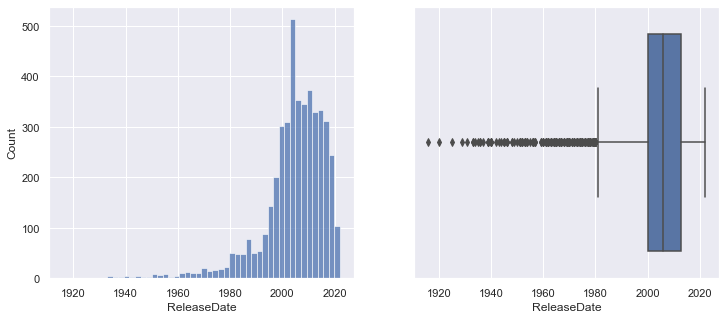

In [740]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(X_train['ReleaseDate'], bins=50, ax=axes[0])
sns.boxplot(data=X_train, x='ReleaseDate', ax=axes[1])

<AxesSubplot:xlabel='ProductionBudget'>

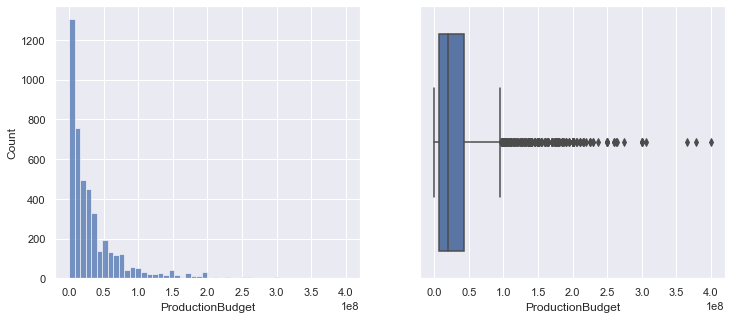

In [741]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(X_train['ProductionBudget'], bins=50, ax=axes[0])
sns.boxplot(data=X_train, x='ProductionBudget', ax=axes[1])

<AxesSubplot:xlabel='RunningTime'>

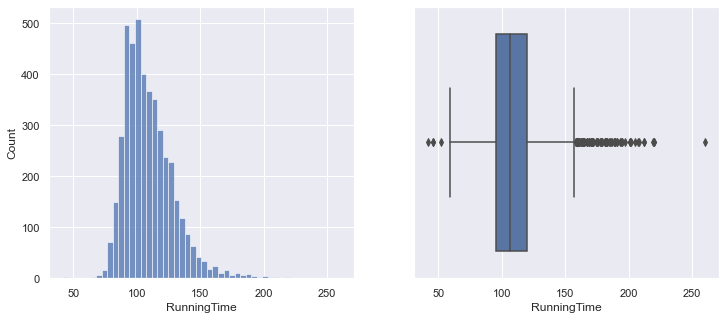

In [742]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(X_train['RunningTime'], bins=50, ax=axes[0])
sns.boxplot(data=X_train, x='RunningTime', ax=axes[1])

In [743]:
# xử lý ngoại lệ cho phân bố lệch
def outliers_for_skewed_distribution(df, col):
    res = df.copy()
    q3 , q1 = np.percentile(res[col], [75,25])
    IQR = q3 - q1
    upper_boundary = q3 + 1.5 * IQR
    lower_boundary = q1 - 1.5 * IQR
    res[col][res[col] >= upper_boundary] = upper_boundary
    res[col][res[col] <= lower_boundary] = lower_boundary
    return res

In [744]:
# xử lý ngoại lệ cho phân bố chuẩn
def outliers_for_normal_distribution(df, col):
  res = df.copy()
  q3 , q1 = np.percentile(res[col], [75,25])
  IQR = q3 - q1
  mean = res[col].mean()
  upper_boundary = mean + 1.5 * IQR
  lower_boundary = mean - 1.5 * IQR
  res[col][res[col] >= upper_boundary] = upper_boundary
  res[col][res[col] <= lower_boundary] = lower_boundary
  return res

In [745]:
def handle_outlier(df):
  res = df.copy()
  res = outliers_for_skewed_distribution(res, 'ProductionBudget')
  res = outliers_for_normal_distribution(res, 'RunningTime')
  res = outliers_for_skewed_distribution(res, 'ReleaseDate')
  return res

In [746]:
# X_train = handle_outlier(X_train)

<AxesSubplot:xlabel='ReleaseDate'>

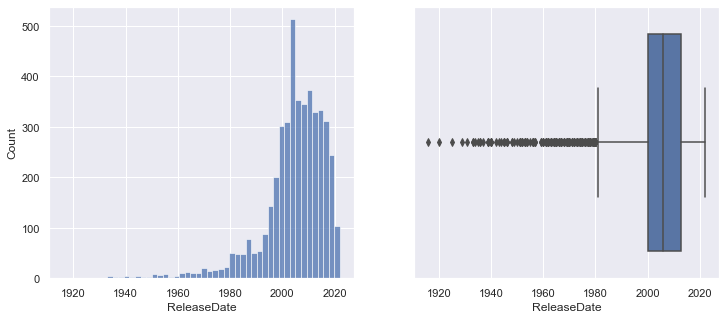

In [747]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(X_train['ReleaseDate'], bins=50, ax=axes[0])
sns.boxplot(data=X_train, x='ReleaseDate', ax=axes[1])

<AxesSubplot:xlabel='ProductionBudget'>

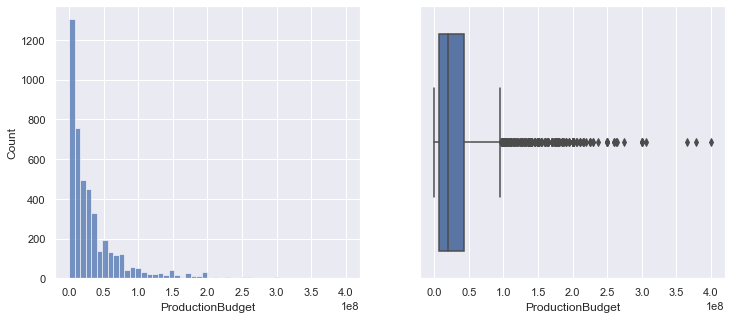

In [748]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(X_train['ProductionBudget'], bins=50, ax=axes[0])
sns.boxplot(data=X_train, x='ProductionBudget', ax=axes[1])

<AxesSubplot:xlabel='RunningTime'>

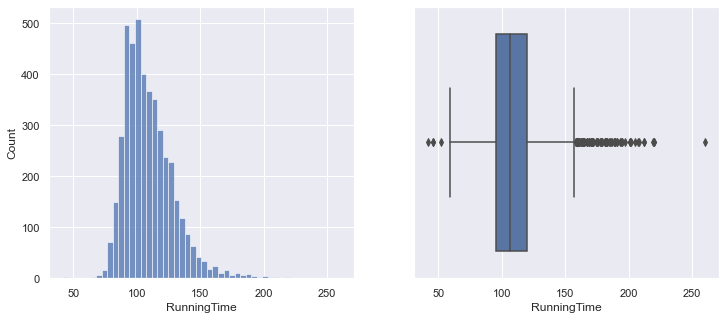

In [749]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.histplot(X_train['RunningTime'], bins=50, ax=axes[0])
sns.boxplot(data=X_train, x='RunningTime', ax=axes[1])

In [750]:
X_train.head(10)

,ReleaseDate,Movie,Source,Genre,ProductionMethod,CreativeType,ProductionCountries,Languages,ProductionBudget,RunningTime
5307,2007.0,The Last Sin Eater,Fiction Book/Short Story,Drama,Live Action,Historical Fiction,United States,English,2200000,117.0
927,2015.0,The Hateful Eight,Original Screenplay,Western,Live Action,Historical Fiction,United States,English,62000000,167.0
440,2010.0,Legend of the Guardians: The Owls of Ga'Hoole,Fiction Book/Short Story,Adventure,Digital Animation,Kids Fiction,United States,English,100000000,90.0
5901,2014.0,Faith Connections,Real Life Events,Documentary,Live Action,Factual,Others,Others,550000,115.0
3396,1996.0,Silent Trigger,Others,Thriller/Suspense,Live Action,Others,Others,English,15000000,93.0
4220,2015.0,Me and Earl and the Dying Girl,Fiction Book/Short Story,Drama,Live Action,Contemporary Fiction,United States,English,8000000,105.0
1794,2012.0,This is 40,Spin-Off,Comedy,Live Action,Contemporary Fiction,United States,English,35000000,134.0
1253,1990.0,Gremlins 2: The New Batch,Original Screenplay,Comedy,Live Action,Fantasy,United States,English,50000000,106.0
5698,2014.0,Obvious Child,Short Film,Romantic Comedy,Live Action,Contemporary Fiction,United States,English,1000000,83.0
2145,2004.0,First Daughter,Original Screenplay,Romantic Comedy,Live Action,Contemporary Fiction,Others,English,30000000,106.0


In [751]:
def handle_category_variable(df):
  le = preprocessing.LabelEncoder()

  res = df.copy()
  res['ProductionCountries'].replace({"United States": 1, "Others": 0}, inplace=True)
  res.rename(columns={'ProductionCountries' : 'InUnitedStates'}, inplace=True)

  res['Languages'].replace({"English": 1, "Others": 0}, inplace=True)
  res.rename(columns={'Languages' : 'English'}, inplace=True)

  res['Movie'] = le.fit_transform(res['Movie'])
  res['Source'] = le.fit_transform(res['Source'])
  res['Genre'] = le.fit_transform(res['Genre'])
  res['ProductionMethod'] = le.fit_transform(res['ProductionMethod'])
  res['CreativeType'] = le.fit_transform(res['CreativeType'])
  return res

In [752]:
X_train = handle_category_variable(X_train)

In [753]:
X_train.head()

,ReleaseDate,Movie,Source,Genre,ProductionMethod,CreativeType,InUnitedStates,English,ProductionBudget,RunningTime
5307,2007.0,3652,4,6,3,4,1,1,2200000,117.0
927,2015.0,3540,10,13,3,4,1,1,62000000,167.0
440,2010.0,1936,4,1,1,5,1,1,100000000,90.0
5901,2014.0,1139,13,5,3,2,0,0,550000,115.0
3396,1996.0,2935,11,12,3,7,0,1,15000000,93.0


## Scaler

Tiến hành chuẩn hoá dữ liệu sau khi đã xử lý ngoại lệ để giảm bớt sự ảnh hưởng của các giá trị quá lớn.

Ở đây chúng ta sẽ sử dụng chuẩn hoá MinMaxScaler vì nó sẽ đưa các giá trị về [0, 1]. Do đó các đặc trưng sẽ có độ quan trọng ngang nhau

In [754]:
data = X_train.join(df['WorldwideGross'])
data.corr()['WorldwideGross'].sort_values()

ProductionMethod   -0.397596
Genre              -0.247762
Source             -0.089131
Movie               0.011079
ReleaseDate         0.125842
InUnitedStates      0.194251
English             0.195727
CreativeType        0.241065
RunningTime         0.248613
ProductionBudget    0.741965
WorldwideGross      1.000000
Name: WorldwideGross, dtype: float64

In [755]:
def probability_plot(data, column):
  plt.figure(figsize=(10, 6))
  stats.probplot(data[column], plot=plt)
  plt.title(column + ' ' 'probability plot')
  plt.show()

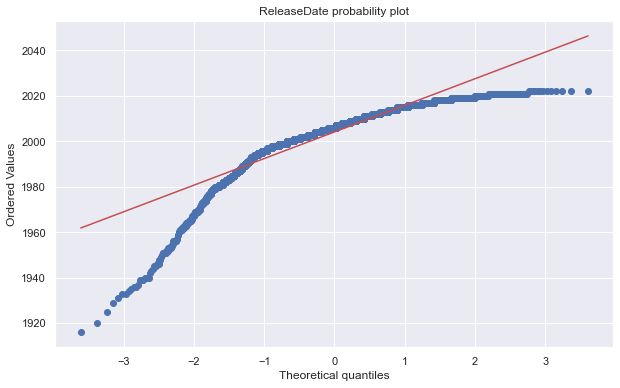

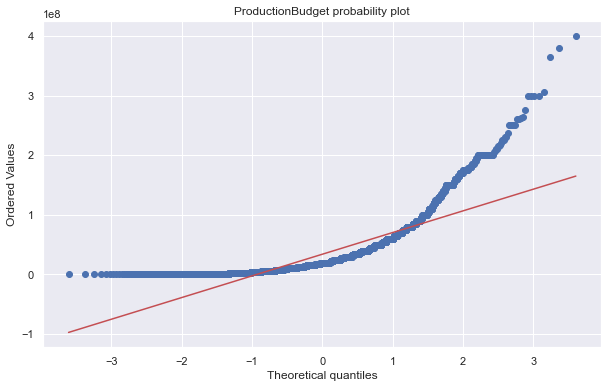

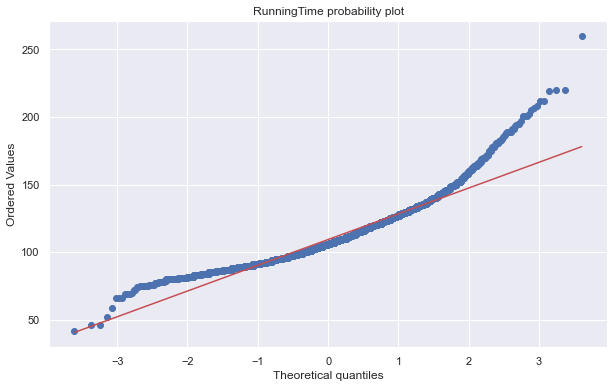

In [756]:
for column in ['ReleaseDate', 'ProductionBudget', 'RunningTime']:
  probability_plot(X_train, column)

In [757]:
def test(column):
    X_log = X_train.copy()
    X_nd = X_train.copy()
    X_sqrt = X_train.copy()
    X_pow = X_train.copy()
    X_box_cox = X_train.copy()

    X_log[column] = np.log1p(X_log[column])
    X_nd[column] = 1 / (X_nd[column])
    X_sqrt[column] = np.sqrt(X_sqrt[column])
    X_pow[column] = np.power(X_pow[column], 2)
    X_box_cox[column], _ = stats.boxcox(X_box_cox[column] + 1)

    probability_plot(X_log, column)
    probability_plot(X_nd, column)
    probability_plot(X_sqrt, column)
    probability_plot(X_pow, column)
    probability_plot(X_box_cox, column)
    

In [758]:
# test('ReleaseDate') boxcox
# test('ProductionBudget') sqrt
# test('RunningTime') boxcox

In [759]:
X_train_normal_distri = X_train.copy()
for column in ['ReleaseDate', 'ProductionBudget', 'RunningTime']:
  if column == 'ProductionBudget':
    X_train_normal_distri[column]= np.sqrt(X_train_normal_distri[column])
    continue
  X_train_normal_distri[column], _ = stats.boxcox(X_train_normal_distri[column] + 1)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [760]:
X_train_normal_distri.head()

,ReleaseDate,Movie,Source,Genre,ProductionMethod,CreativeType,InUnitedStates,English,ProductionBudget,RunningTime
5307,8.634994e+152,3652,4,6,3,4,1,1,1483.239697,1.323705
927,1.040152e+153,3540,10,13,3,4,1,1,7874.007874,1.333155
440,9.260036e+152,1936,4,1,1,5,1,1,10000.000000,1.315016
5901,1.016272e+153,1139,13,5,3,2,0,0,741.619849,1.323183
3396,6.677086e+152,2935,11,12,3,7,0,1,3872.983346,1.316193


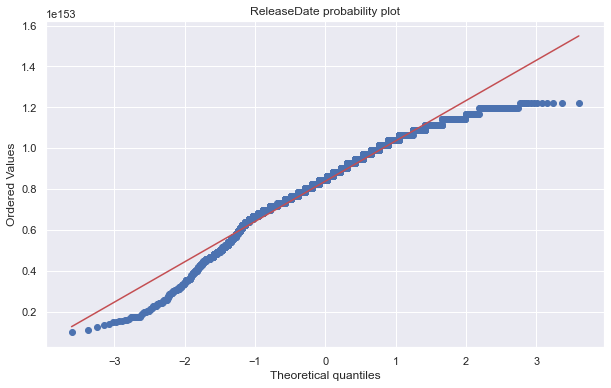

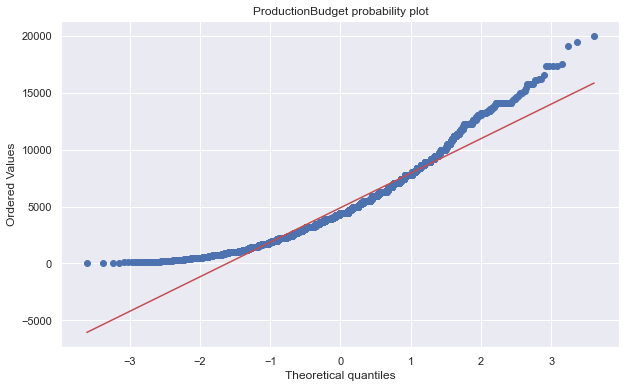

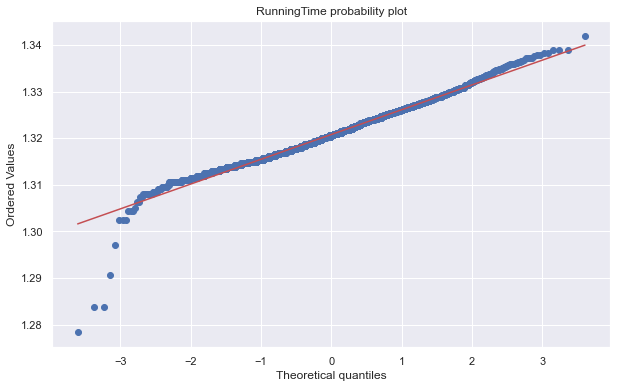

In [761]:
for column in ['ReleaseDate', 'ProductionBudget', 'RunningTime']:
  probability_plot(X_train_normal_distri, column)

In [762]:
X_train_scaled = X_train_normal_distri.copy()
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_normal_distri), columns=X_train_normal_distri.columns)
X_train_scaled.head()

,ReleaseDate,Movie,Source,Genre,ProductionMethod,CreativeType,InUnitedStates,English,ProductionBudget,RunningTime
0,0.680069,0.824007,0.181818,0.461538,0.428571,0.444444,1.0,1.0,0.072624,0.712884
1,0.837108,0.798736,0.454545,1.000000,0.428571,0.444444,1.0,1.0,0.392693,0.861352
2,0.735633,0.436823,0.181818,0.076923,0.142857,0.555556,1.0,1.0,0.499169,0.576375
3,0.815879,0.256995,0.590909,0.384615,0.428571,0.222222,0.0,0.0,0.035482,0.704679
4,0.506016,0.662229,0.500000,0.923077,0.428571,0.777778,0.0,1.0,0.192310,0.594869


In [763]:
X_train_scaled.shape

(4484, 10)

In [764]:
data = X_train_scaled.join(df['WorldwideGross'])
data.corr()['WorldwideGross'].sort_values()

RunningTime        -0.013230
English            -0.008032
Movie              -0.004940
InUnitedStates     -0.004686
Source             -0.000233
Genre               0.012501
ReleaseDate         0.012797
ProductionMethod    0.013347
ProductionBudget    0.014770
CreativeType        0.024036
WorldwideGross      1.000000
Name: WorldwideGross, dtype: float64

# Model

## Linear regression

In [765]:
X = X_train_scaled.copy().drop(columns = ['Source', 'Movie'])
X

,ReleaseDate,Genre,ProductionMethod,CreativeType,InUnitedStates,English,ProductionBudget,RunningTime
0,0.680069,0.461538,0.428571,0.444444,1.0,1.0,0.072624,0.712884
1,0.837108,1.000000,0.428571,0.444444,1.0,1.0,0.392693,0.861352
2,0.735633,0.076923,0.142857,0.555556,1.0,1.0,0.499169,0.576375
3,0.815879,0.384615,0.428571,0.222222,0.0,0.0,0.035482,0.704679
4,0.506016,0.923077,0.428571,0.777778,0.0,1.0,0.192310,0.594869
...,...,...,...,...,...,...,...,...
4479,0.858824,0.923077,0.428571,0.333333,1.0,1.0,0.156715,0.582656
4480,0.815879,0.461538,0.428571,0.000000,1.0,1.0,0.050866,0.582656
4481,0.698170,0.461538,0.428571,0.000000,1.0,1.0,0.048422,0.617993
4482,0.795128,0.384615,0.428571,0.222222,1.0,1.0,0.033753,0.563448


In [766]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y_train)

LinearRegression()

In [772]:
# X_test = handle_outlier(X_test)
X_test_copy = handle_category_variable(X_test)
X_test_copy = pd.DataFrame(scaler.fit_transform(X_test_copy), columns=X_test_copy.columns)
X_test_copy = X_test_copy.drop(columns = ['Source', 'Movie'])

In [776]:
lin_reg.score(X_test_copy, y_test)

-0.5451299414028485

In [774]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y_train)

SVR()

In [775]:
lin_reg.score(X_test_copy, y_test)

-0.5451299414028485